# Quantum Gates Workshop with Qiskit

Welcome to this introductory workshop on fundamental quantum gates. We will explore concepts of superposition and entanglement through practical examples using IBM's Qiskit library.

This notebook will cover single-qubit gates (Hadamard) and two-qubit gates (CNOT, CZ), which are the essential building blocks for constructing quantum algorithms.

## 1. Prerequisites and Installation

Before we begin, we ensure that the Qiskit and Qiskit Aer libraries are installed. `qiskit` is the SDK for quantum computing, and `qiskit-aer` provides high-performance simulators.

# imports


In [4]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 87.1 MB/s eta 0:00:00


## 2. Single-Qubit Gates: The Hadamard Gate (H)

The Hadamard gate is a fundamental single-qubit gate. It is used to create superpositions of states. When applied to a qubit in the $|0\rangle$ or $|1\rangle$ state, it transforms it into an equal superposition of the two states.

### Matrix Representation

The matrix for the Hadamard gate is given by:

$$H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

### Effect on Basis States

*   $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ : Equal superposition of $|0\rangle$ and $|1\rangle$.
*   $H|1\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ : Equal superposition of $|0\rangle$ and $|1\rangle$ with a relative phase shift.



In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw() # re-run the cell if the figure is not displayed

┌───┐┌─┐
  qreg: ┤ H ├┤M├
        └───┘└╥┘
creg: 1/══════╩═
              0

{'0': 5015, '1': 4985}

State 0 is observed with frequency % 50.15
State 1 is observed with frequency % 49.85



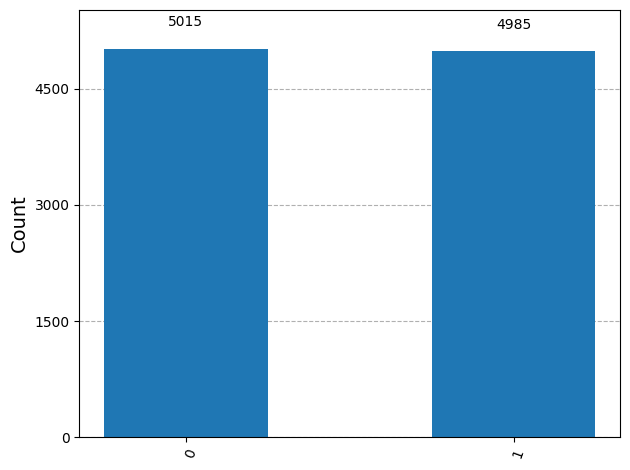

In [6]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

print()
n_zeros = counts['0']
n_ones = counts['1']
print("State 0 is observed with frequency %",100*n_zeros/(n_zeros+n_ones))
print("State 1 is observed with frequency %",100*n_ones/(n_zeros+n_ones))

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)


### Effect of two consecutive Hadamard gates (H.H = I)

Applying the Hadamard gate twice in a row cancels its effect, returning the qubit to its initial state. This is because $H^2 = I$ (where $I$ is the identity matrix).

*   $H(H|0\rangle) = H \left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \right) = \frac{1}{\sqrt{2}} (H|0\rangle + H|1\rangle) = \frac{1}{\sqrt{2}} \left( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) + \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle) \right) = \frac{1}{2}(|0\rangle + |1\rangle + |0\rangle - |1\rangle) = \frac{1}{2}(2|0\rangle) = |0\rangle$




In [7]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])


# apply h-gate to the first qubit another tim e
qc.h(q[0])

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw() # re-run the cell if the figure is not displayed

┌───┐┌───┐┌─┐
  qreg: ┤ H ├┤ H ├┤M├
        └───┘└───┘└╥┘
creg: 1/═══════════╩═
                   0

{'0': 10000}

State 0 is observed with frequency % 100.0
State 1 is observed with frequency % 0.0



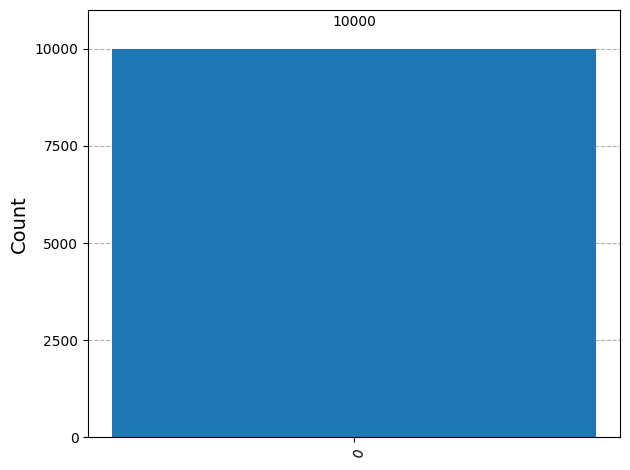

In [8]:
# execute the circuit 10000 times in the local simulator

job = AerSimulator().run(qc,shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

print()
n_zeros = counts.get('0', 0) # Use .get() to safely retrieve value, defaulting to 0 if key not found
n_ones = counts.get('1', 0)   # Use .get() to safely retrieve value, defaulting to 0 if key not found

total_shots = n_zeros + n_ones

if total_shots > 0:
  print("State 0 is observed with frequency %",100*n_zeros/total_shots)
  print("State 1 is observed with frequency %",100*n_ones/total_shots)
else:
  print("No measurements recorded.")

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

## 3. Two-Qubit Gates

Two-qubit gates are essential for creating entanglement between qubits, a key resource in quantum computing. We will explore two of them: CNOT and CZ.

### 3.1. CNOT (Controlled-NOT) Gate

The CNOT gate is one of the most important two-qubit gates. It has a **control** qubit and a **target** qubit.

*   If the control qubit is in the $|0\rangle$ state, the target qubit remains unchanged.
*   If the control qubit is in the $|1\rangle$ state, the target qubit is flipped (a NOT operation is applied to it).

### Matrix Representation

For a control on qubit 0 and a target on qubit 1, the CNOT matrix is:

$$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$

### Effect of the CNOT Gate

*   $CNOT|00\rangle = |00\rangle$
*   $CNOT|01\rangle = |01\rangle$
*   $CNOT|10\rangle = |11\rangle$
*   $CNOT|11\rangle = |10\rangle$






In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc_cnot = QuantumCircuit(2, 2)

qc_cnot.x(0)

qc_cnot.barrier()

qc_cnot.cx(0, 1)

qc_cnot.measure([0, 1], [0, 1])

print("Circuit CNOT:\n")
print(qc_cnot.draw(output='text'))

simulator = AerSimulator()
compiled_circuit = transpile(qc_cnot, simulator)
job = simulator.run(compiled_circuit, shots=1024)
counts = job.result().get_counts(qc_cnot)



Circuit CNOT:

     ┌───┐ ░      ┌─┐   
q_0: ┤ X ├─░───■──┤M├───
     └───┘ ░ ┌─┴─┐└╥┘┌─┐
q_1: ──────░─┤ X ├─╫─┤M├
           ░ └───┘ ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 



Measurement results---
{'11': 1024}


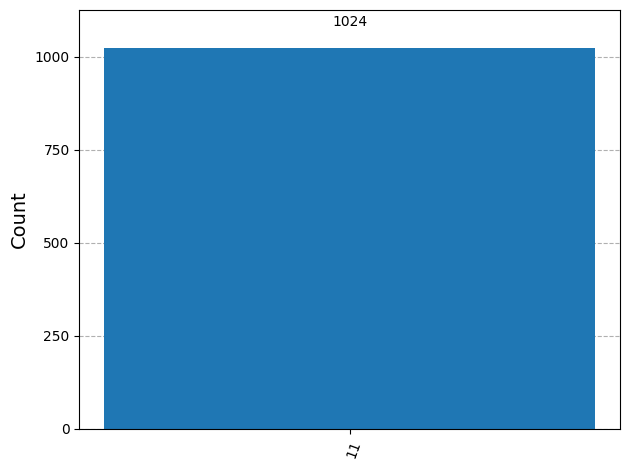

In [10]:
print("\nMeasurement results---")
print(counts)

plot_histogram(counts, title='Results CNOT').show()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 3.2. CZ (Controlled-Z) Gate

1.   Élément de liste
2.   Élément de liste



The CZ gate is another two-qubit gate. It applies a Z gate to the target qubit if the control qubit is in the $|1\rangle$ state. It is a symmetric gate, meaning the choice of control and target does not matter; $CZ(q_0, q_1) = CZ(q_1, q_0)$.

### Matrix Representation

The matrix for the CZ gate is given by:

$$CZ = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{pmatrix}$$

### Effect of the CZ Gate

The CZ gate only modifies the state if both qubits are in the $|1\rangle$ state, in which case it introduces a phase factor of -1. Its effect is more apparent on superpositions:

*   $CZ|00\rangle = |00\rangle$
*   $CZ|01\rangle = |01\rangle$
*   $CZ|10\rangle = |10\rangle$
*   $CZ|11\rangle = -|11\rangle$

In [11]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram


qc_cz = QuantumCircuit(2)


qc_cz.h(0)
qc_cz.h(1)

qc_cz.barrier()

qc_cz.cz(0, 1)

print("Circuit CZ:\n")
print(qc_cz.draw(output='text'))

final_state_cz = Statevector.from_circuit(qc_cz)
print("\nVecteur H(0)H(1)CZ(0,1):\n")
print(final_state_cz)

qc_cz_measure = QuantumCircuit(2, 2)
qc_cz_measure.h(0)
qc_cz_measure.h(1)
qc_cz_measure.cz(0, 1)
qc_cz_measure.measure([0,1], [0,1])

simulator_cz = AerSimulator()
compiled_circuit_cz = transpile(qc_cz_measure, simulator_cz)
job_cz = simulator_cz.run(compiled_circuit_cz, shots=1024)
counts_cz = job_cz.result().get_counts(qc_cz_measure)

print("\nResults after measurement:\n")
print(counts_cz)
plot_histogram(counts_cz, title='Résultats CZ avec H(0)H(1) et mesure').show()

Circuit CZ:

     ┌───┐ ░    
q_0: ┤ H ├─░──■─
     ├───┤ ░  │ 
q_1: ┤ H ├─░──■─
     └───┘ ░    

Vecteur H(0)H(1)CZ(0,1):

Statevector([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j],
            dims=(2, 2))

Results after measurement:

{'11': 274, '01': 229, '00': 272, '10': 249}


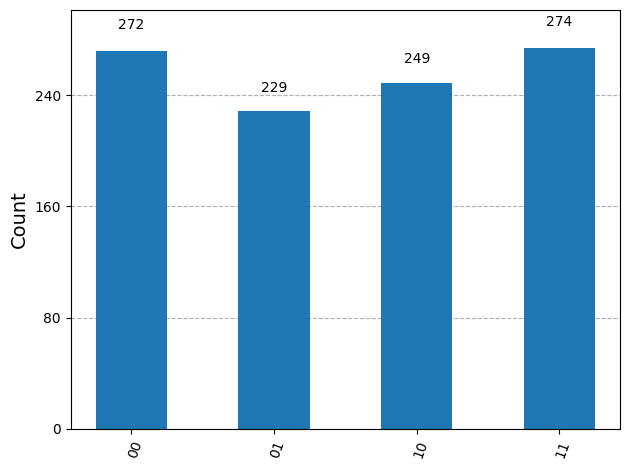

In [12]:
plot_histogram(counts_cz)

### Mini Exercise: Understanding a Quantum Circuit

Consider the following quantum circuit acting on two qubits, both initialized in the state $|00\rangle$:

q0 ──H────●────

│

q1 ───────X────


where **H** is the Hadamard gate, **●** denotes the control qubit, and **X** is the (NOT) gate.

1.   Write the state of the two-qubit system after applying the Hadamard gate on the first qubit.

2.   Apply the controlled-NOT (CNOT) gate to the resulting state and compute the final state of the system.

3.   Is the final state separable or entangled? Explain briefly.

4.   Based on your result, describe in one sentence what this quantum circuit does.

*Hint:* Recall that the Hadamard gate creates superposition, and the CNOT gate can generate entanglement.




In [15]:
# Quantum circuit example: H + CNOT

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Apply Hadamard gate to qubit 0
qc.h(0)

# Apply CNOT with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Display the circuit
print(qc)

# Simulate the circuit starting from |00>
state = Statevector.from_label("00")
final_state = state.evolve(qc)

# Print the final statevector
print("\nFinal statevector:")
print(final_state)


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Final statevector:
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


### Mini Exercise: SWAP Gate

Consider a two-qubit quantum system and the **SWAP** gate.

1.   Write the matrix representation of the SWAP gate in the computational basis  
     $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$.

2.   Apply the SWAP gate to the following basis states and write the resulting states:
     * $|01\rangle$
     * $|10\rangle$

3.   Let the initial state of the system be:
     $
     |\psi\rangle = \frac{1}{\sqrt{2}} \left( |01\rangle + |10\rangle \right)
    $
     Compute the state after applying the SWAP gate.

4.   Based on your result in question 3, is the state $|\psi\rangle$ invariant under the SWAP gate? Justify your answer briefly.

*Hint:* The SWAP gate exchanges the states of the two qubits.


In [14]:
# YOUR CODE

          ┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘
